# Classification with Logistic Regression, Decision Trees, and Random Forests
# Using Iris and MNIST datasets

In [2]:
# ==================================================
# Importing the necessary libraries
# ==================================================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_iris, fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set a nice style for plots
sns.set(style="whitegrid")

## Iris Dataset

![Iris Dataset](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*7bnLKsChXq94QjtAiRn40w.png)

In [3]:
# ==================================================
# Part 1: Iris Dataset
# ==================================================
# The Iris dataset is small (150 samples, 4 features), easy to visualize, and good for quick demos.


# Load the dataset
iris = load_iris()
X_iris, y_iris = iris.data, iris.target


# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris)

print(iris.DESCR)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

===== Logistic Regression on Iris =====
Accuracy: 0.9111111111111111
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



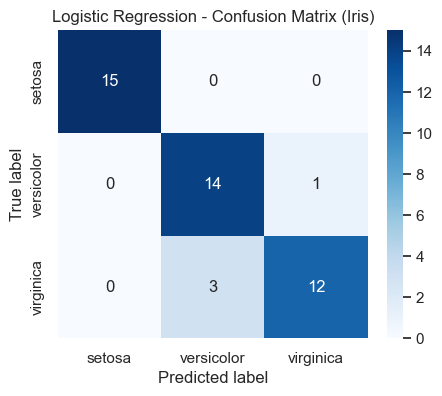

In [2]:
# --------------------------------------------------
# Logistic Regression on Iris
# --------------------------------------------------
print("===== Logistic Regression on Iris =====")


# Standardize features (important for models like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))


# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Logistic Regression - Confusion Matrix (Iris)")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

===== Decision Tree on Iris =====
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



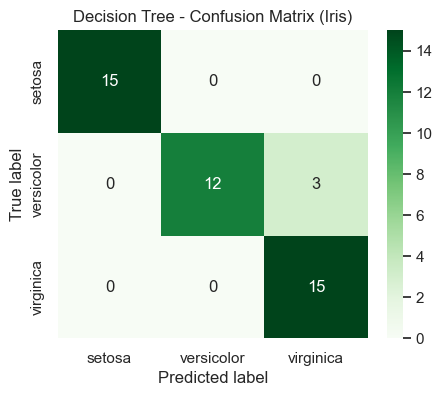

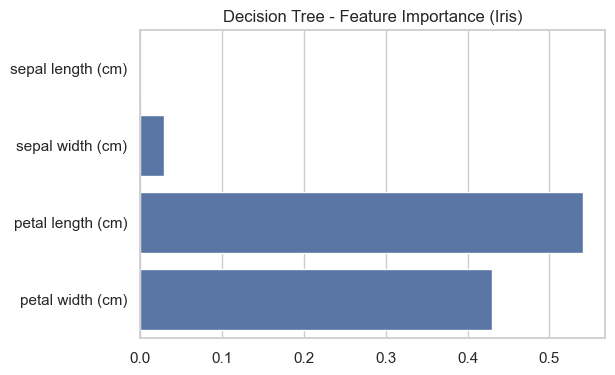

In [4]:
# --------------------------------------------------
# Decision Tree on Iris
# --------------------------------------------------
print("===== Decision Tree on Iris =====")


dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))


# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Greens", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Decision Tree - Confusion Matrix (Iris)")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


# Feature Importance
plt.figure(figsize=(6,4))
importances = dt.feature_importances_
sns.barplot(x=importances, y=iris.feature_names)
plt.title("Decision Tree - Feature Importance (Iris)")
plt.show()

===== Random Forest on Iris =====
Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



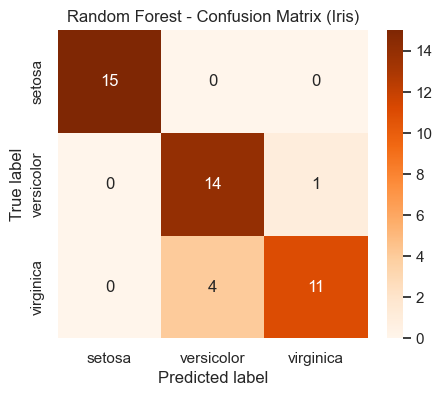

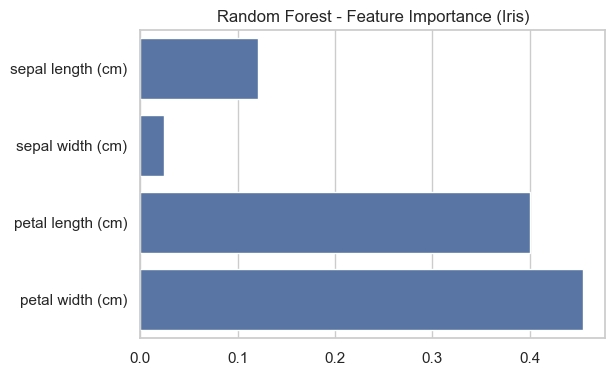

In [6]:
# --------------------------------------------------
# Random Forest on Iris
# --------------------------------------------------
print("===== Random Forest on Iris =====")


rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))


# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Oranges", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Random Forest - Confusion Matrix (Iris)")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


# Feature Importance
plt.figure(figsize=(6,4))
importances = rf.feature_importances_
sns.barplot(x=importances, y=iris.feature_names)
plt.title("Random Forest - Feature Importance (Iris)")
plt.show()

## MNIST Dataset

![MNIST Dataset](https://upload.wikimedia.org/wikipedia/commons/b/b1/MNIST_dataset_example.png)

In [9]:
# ==================================================
# Part 2: MNIST Dataset
# ==================================================
# MNIST is a classic dataset of 70,000 images of handwritten digits (28x28 pixels).
# We'll only use a subset for speed.


print("\n===== Loading MNIST Dataset =====")


mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X_mnist, y_mnist = mnist.data, mnist.target.astype(int)


# For speed, we'll take a smaller subset (e.g., 10000 samples)
X_mnist, _, y_mnist, _ = train_test_split(X_mnist, y_mnist, train_size=10000, stratify=y_mnist, random_state=42)


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=42, stratify=y_mnist)

print(mnist.DESCR)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


===== Loading MNIST Dataset =====
(7000, 784) (3000, 784) (7000,) (3000,)


===== Logistic Regression on MNIST =====
Accuracy: 0.883
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       296
           1       0.93      0.98      0.95       337
           2       0.88      0.85      0.86       300
           3       0.88      0.87      0.87       306
           4       0.89      0.88      0.89       292
           5       0.85      0.81      0.83       271
           6       0.90      0.90      0.90       295
           7       0.87      0.91      0.89       313
           8       0.85      0.84      0.84       292
           9       0.85      0.83      0.84       298

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000



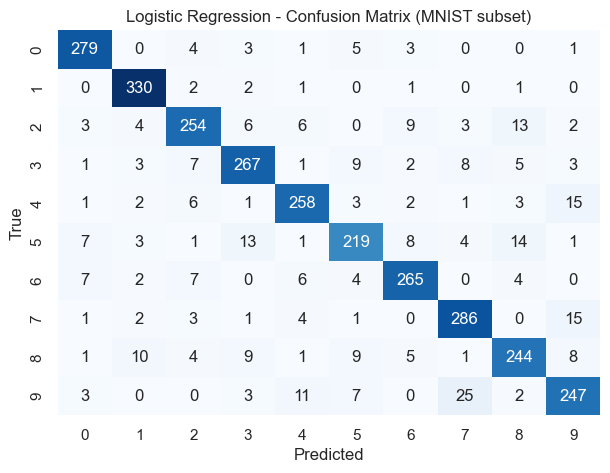

In [14]:
# --------------------------------------------------
# Logistic Regression on MNIST
# --------------------------------------------------
print("===== Logistic Regression on MNIST =====")


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="Blues", cbar=False, annot=True, fmt="d")
plt.title("Logistic Regression - Confusion Matrix (MNIST subset)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

===== Decision Tree on MNIST =====
Accuracy: 0.7966666666666666
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       296
           1       0.87      0.94      0.90       337
           2       0.77      0.75      0.76       300
           3       0.74      0.78      0.76       306
           4       0.80      0.77      0.78       292
           5       0.73      0.73      0.73       271
           6       0.84      0.79      0.81       295
           7       0.89      0.87      0.88       313
           8       0.73      0.68      0.70       292
           9       0.72      0.76      0.74       298

    accuracy                           0.80      3000
   macro avg       0.79      0.79      0.79      3000
weighted avg       0.80      0.80      0.80      3000



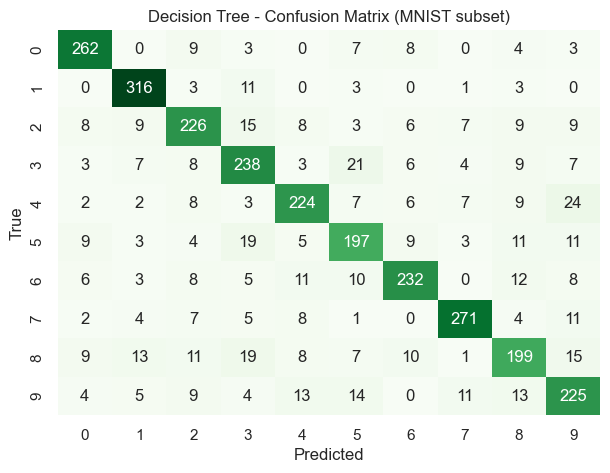

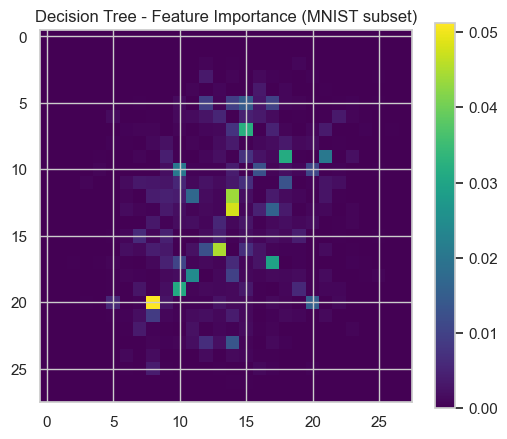

In [15]:
# --------------------------------------------------
# Decision Tree on MNIST
# --------------------------------------------------
print("===== Decision Tree on MNIST =====")


dt = DecisionTreeClassifier(random_state=42, max_depth=20) # limit depth for speed
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="Greens", cbar=False, annot=True, fmt="d")
plt.title("Decision Tree - Confusion Matrix (MNIST subset)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# Feature Importance (average over pixels)
plt.figure(figsize=(6,5))
importances = dt.feature_importances_
plt.imshow(importances.reshape(28,28), cmap="viridis")
plt.title("Decision Tree - Feature Importance (MNIST subset)")
plt.colorbar()
plt.show()

===== Random Forest on MNIST =====
Accuracy: 0.936
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       296
           1       0.94      0.98      0.96       337
           2       0.92      0.94      0.93       300
           3       0.93      0.91      0.92       306
           4       0.92      0.96      0.94       292
           5       0.93      0.93      0.93       271
           6       0.95      0.95      0.95       295
           7       0.95      0.94      0.94       313
           8       0.94      0.89      0.91       292
           9       0.92      0.88      0.90       298

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000



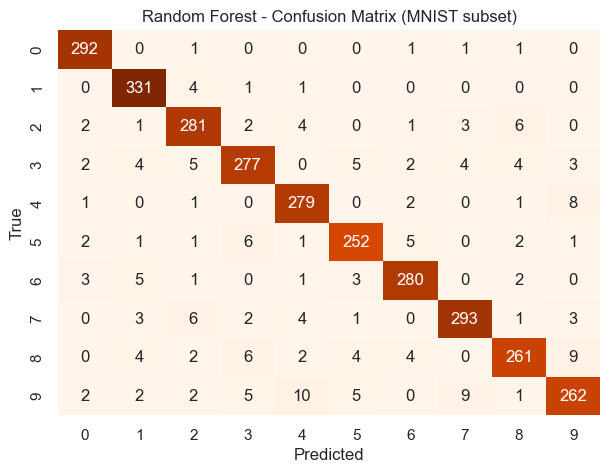

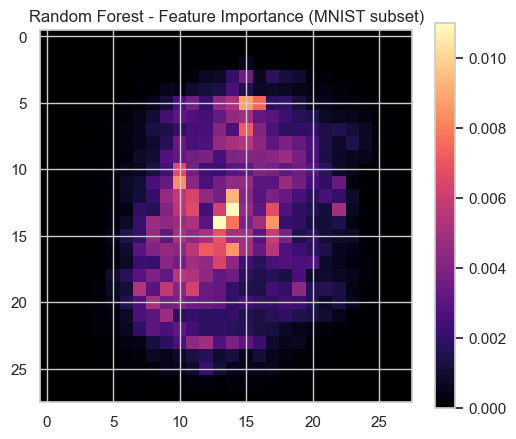

In [18]:
# --------------------------------------------------
# Random Forest on MNIST
# --------------------------------------------------
print("===== Random Forest on MNIST =====")


rf = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=20, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="Oranges", cbar=False, annot=True, fmt="d")
plt.title("Random Forest - Confusion Matrix (MNIST subset)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# Feature Importance visualization
plt.figure(figsize=(6,5))
importances = rf.feature_importances_
plt.imshow(importances.reshape(28,28), cmap="magma")
plt.title("Random Forest - Feature Importance (MNIST subset)")
plt.colorbar()
plt.show()